## Departments graph (undirected)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

## Graph creation

In [2]:
new_list_edges_department = []
with open("link_departments.txt", "r") as f:
    for line in f:
        s = line.strip()
        a, b = s.split(" ")
        if(int(a)!=int(b)):
            new_list_edges_department.append((int(a),int(b)))

In [3]:
graph_departments = nx.Graph()
#graph_departments.add_edges_from(new_list_edges_department)
#pos = nx.spring_layout(graph_departments)

In [4]:
#default_weight = 0
#for nodes in new_list_edges_department:
#    n0 = nodes[0]
#    n1 = nodes[1]
#    if graph_departments.has_edge(n0,n1):
#        graph_departments[n0][n1]['weight'] += default_weight
#    else:
#        new_list_edges_department.add_edge(n0,n1, weight=default_weight)

        
                
        
        
from collections import Counter

# create edge counts

counter = Counter(tuple(sorted(tup)) for tup in new_list_edges_department)
print(counter)


Counter({(4, 36): 384, (4, 5): 321, (21, 22): 313, (15, 36): 276, (0, 4): 273, (14, 36): 250, (1, 36): 237, (10, 13): 227, (0, 7): 220, (11, 13): 204, (10, 11): 190, (4, 7): 176, (10, 36): 171, (4, 14): 166, (7, 36): 164, (21, 32): 160, (21, 36): 154, (4, 10): 153, (19, 36): 151, (4, 34): 146, (4, 13): 136, (23, 36): 130, (1, 4): 129, (20, 21): 124, (8, 15): 120, (16, 36): 114, (13, 36): 112, (36, 37): 111, (9, 15): 111, (11, 36): 108, (15, 34): 108, (34, 36): 107, (4, 25): 104, (1, 15): 104, (1, 7): 103, (0, 36): 102, (8, 36): 101, (22, 28): 99, (9, 36): 95, (21, 25): 92, (17, 36): 89, (5, 36): 85, (36, 38): 84, (15, 35): 83, (21, 28): 83, (4, 8): 82, (27, 36): 82, (6, 36): 81, (14, 34): 79, (4, 15): 79, (4, 11): 79, (19, 21): 79, (1, 34): 73, (4, 26): 73, (14, 35): 72, (4, 35): 72, (20, 22): 70, (35, 36): 67, (34, 35): 67, (14, 15): 64, (3, 4): 63, (15, 26): 63, (10, 20): 61, (3, 36): 60, (22, 36): 59, (15, 29): 58, (15, 38): 58, (13, 34): 58, (20, 36): 58, (19, 34): 57, (28, 36): 55

In [5]:
# add edges to the graph
G_departments = nx.Graph()
for (u, v), weight in counter.items():
    G_departments.add_edge(u, v, weight=weight)
print(G_departments)
print(G_departments.edges(data=True))

Graph with 42 nodes and 641 edges
[(14, 25, {'weight': 38}), (14, 9, {'weight': 35}), (14, 26, {'weight': 43}), (14, 4, {'weight': 166}), (14, 36, {'weight': 250}), (14, 35, {'weight': 72}), (14, 38, {'weight': 33}), (14, 34, {'weight': 79}), (14, 6, {'weight': 13}), (14, 23, {'weight': 18}), (14, 7, {'weight': 37}), (14, 10, {'weight': 15}), (14, 27, {'weight': 9}), (14, 13, {'weight': 20}), (14, 15, {'weight': 64}), (14, 19, {'weight': 37}), (14, 21, {'weight': 23}), (14, 1, {'weight': 52}), (14, 5, {'weight': 34}), (14, 22, {'weight': 22}), (14, 11, {'weight': 12}), (14, 16, {'weight': 12}), (14, 17, {'weight': 11}), (14, 0, {'weight': 22}), (14, 8, {'weight': 14}), (14, 37, {'weight': 21}), (14, 40, {'weight': 4}), (14, 24, {'weight': 2}), (14, 30, {'weight': 4}), (14, 39, {'weight': 15}), (14, 31, {'weight': 14}), (14, 2, {'weight': 6}), (14, 12, {'weight': 2}), (14, 3, {'weight': 4}), (14, 20, {'weight': 7}), (14, 29, {'weight': 2}), (14, 28, {'weight': 9}), (14, 32, {'weight': 2

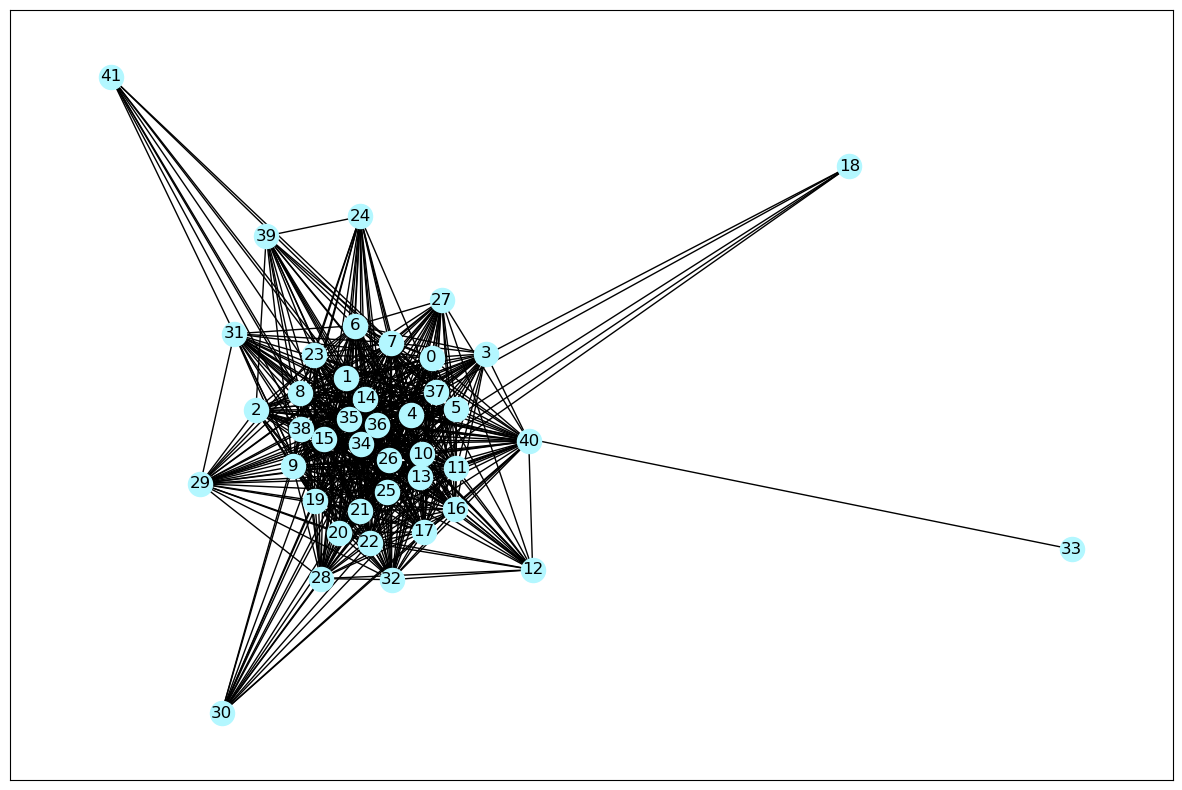

In [6]:
#graph = nx.Graph()
#graph.add_weighted_edges_from(weighted_edges)

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G_departments)
nx.draw_networkx(G_departments,pos, node_color = '#b3f7ff')
#edge_labels = nx.get_edge_attributes(G_departments, "weight")
#nx.draw_networkx_edge_labels(G_departments, pos, edge_labels=edge_labels)
plt.show()

In [7]:
print(nx.average_clustering(G_departments))

0.8750658329738243


In [48]:
print("Nodi: " , len(G_departments.nodes))
print("Archi: " , len(G_departments.edges))

Nodi:  42
Archi:  641


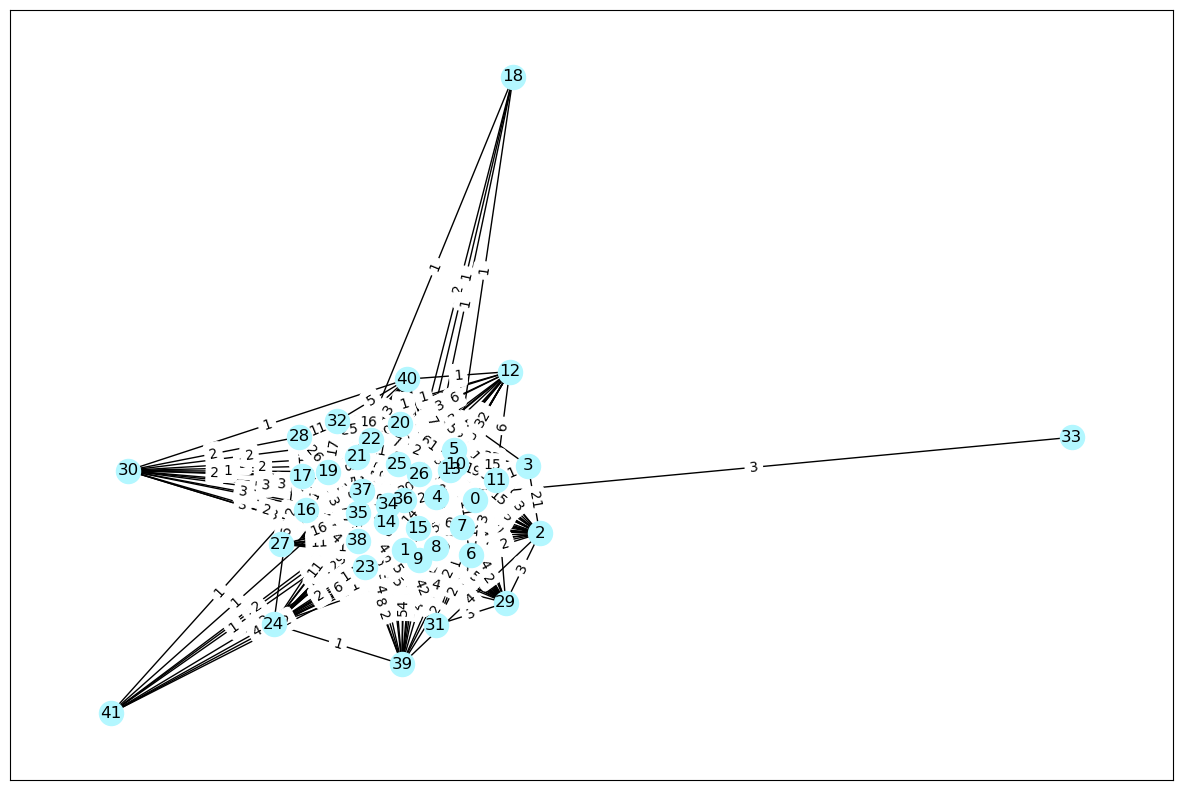

In [49]:
#graph = nx.Graph()
#graph.add_weighted_edges_from(weighted_edges)

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G_departments)
nx.draw_networkx(G_departments,pos, node_color = '#b3f7ff')
edge_labels = nx.get_edge_attributes(G_departments, "weight")
nx.draw_networkx_edge_labels(G_departments, pos, edge_labels=edge_labels)
plt.show()

In [50]:
print(nx.is_connected(G_departments))

True


In [51]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), )
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [52]:
def average(lst):
    return sum(lst) / len(lst)

0.7444831591173056


<Figure size 1500x1000 with 0 Axes>

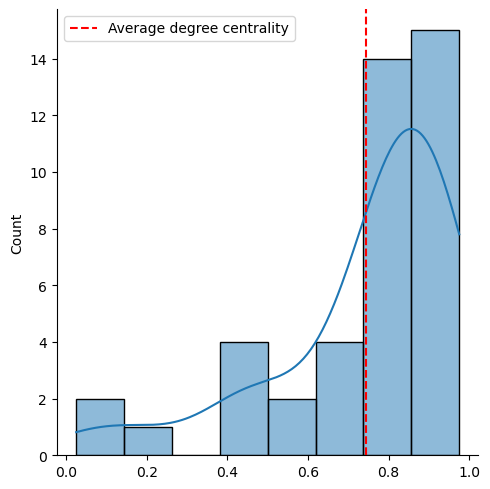

In [53]:
degree_centr_ = nx.degree_centrality(G_departments) 

from matplotlib.lines import Line2D

print(average(list(degree_centr_.values())))
plt.figure(figsize=(15,10))
sns.displot(list(degree_centr_.values()), kde=True)
plt.axvline(average(list(degree_centr_.values())), color='red', ls='--')

line = [Line2D([0], [0], color='red', linestyle='--')]

labels = ["Average degree centrality"]
plt.legend(line, labels)
plt.show()

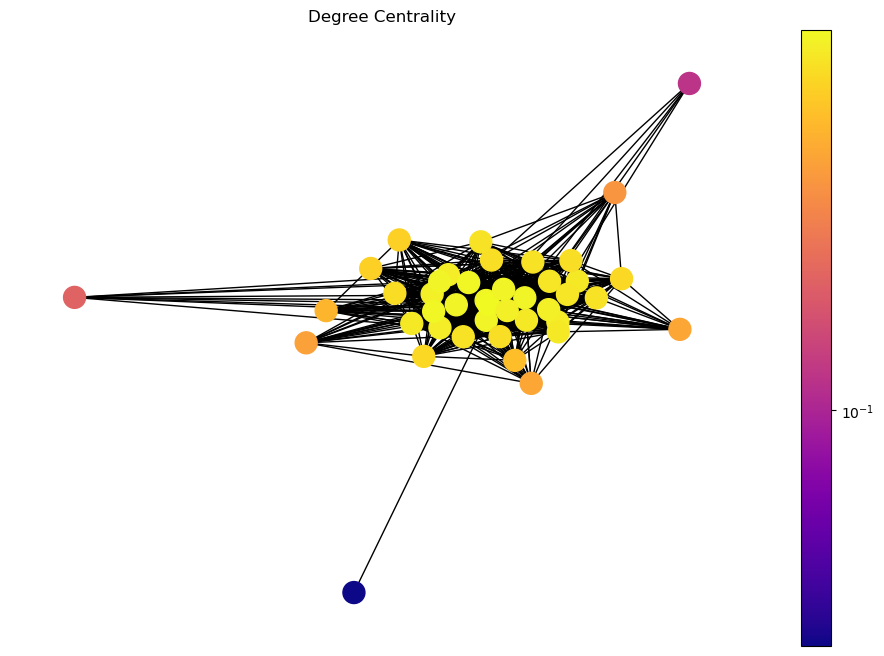

In [54]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G_departments)
draw(G_departments, pos, degree_centr_,'Degree Centrality')

In [55]:
print(nx.is_connected(G_departments))

True


In [56]:
nx.write_edgelist(G_departments, "weighted_dep_graph.txt", delimiter=' ', data=['weight'])

In [57]:
weight_list = []

with open("weighted_dep_graph.txt", "r") as f:
    for line in f:
        s = line.strip()
        u, v, w = s.split(" ")
        weight_list.append(int(w))
print(type(weight_list))
print(weight_list)

<class 'list'>
[38, 35, 43, 166, 250, 72, 33, 79, 13, 18, 37, 15, 9, 20, 64, 37, 23, 52, 34, 22, 12, 12, 11, 22, 14, 21, 4, 2, 4, 15, 14, 6, 2, 4, 7, 2, 9, 28, 104, 7, 27, 38, 27, 4, 41, 18, 21, 23, 30, 37, 92, 22, 21, 18, 22, 3, 12, 10, 36, 22, 26, 4, 9, 5, 23, 2, 7, 6, 2, 3, 2, 1, 3, 51, 16, 95, 111, 35, 30, 48, 38, 22, 20, 4, 24, 13, 23, 7, 14, 12, 8, 22, 18, 22, 6, 10, 2, 3, 7, 2, 8, 4, 10, 1, 2, 2, 5, 12, 23, 36, 52, 32, 23, 37, 12, 73, 43, 45, 63, 37, 26, 33, 5, 19, 5, 12, 3, 6, 6, 21, 32, 19, 9, 3, 2, 2, 2, 10, 1, 4, 6, 2, 176, 321, 43, 129, 82, 136, 273, 79, 153, 72, 384, 28, 9, 21, 146, 79, 35, 63, 34, 37, 24, 32, 40, 20, 3, 32, 11, 13, 4, 9, 5, 5, 3, 3, 35, 11, 30, 4, 2, 8, 37, 6, 5, 11, 15, 89, 32, 17, 9, 29, 7, 20, 6, 12, 17, 2, 2, 4, 2, 7, 2, 2, 43, 107, 58, 25, 51, 108, 67, 35, 73, 27, 46, 32, 10, 49, 15, 18, 5, 28, 47, 16, 9, 57, 49, 10, 39, 16, 37, 8, 7, 19, 4, 14, 1, 26, 85, 3, 10, 33, 9, 30, 31, 35, 31, 48, 1, 4, 8, 11, 20, 3, 6, 8, 8, 8, 2, 2, 1, 1, 111, 154, 112, 84

### Weight distribution

25.40405616224649


<Figure size 1500x1000 with 0 Axes>

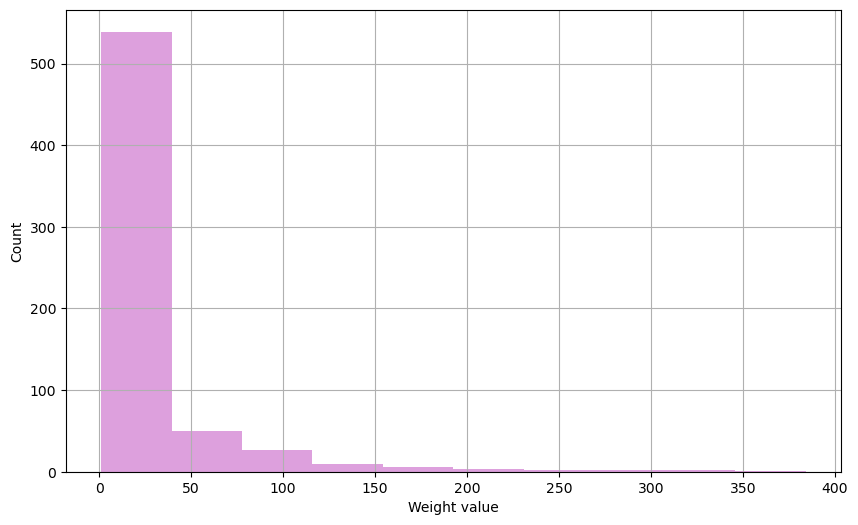

In [33]:
plt.figure(figsize=(15,10))



def average(lst):
    return sum(lst) / len(lst)

print(average(weight_list))
plt.figure(figsize=(10,6))
plt.hist(weight_list, color = "#DDA0DD") #"#7FFFD4", "#DDA0DD", "#800080"
plt.xlabel('Weight value')
plt.ylabel('Count')
plt.grid()
plt.show()

#We notice that there are few edges with an high value of weights -> low frequency of inderaction between departments
#HP: People send emails to people of the same dip

### Selection of edge with weight greater than 30. Subgraph creation (and optimization of the net)

In [34]:
#we observe good and frequent communications between departments

In [35]:
edge_to_remove = [(u,v) for u, v, attrs in G_departments.edges(data=True) if attrs["weight"] < 50]

G_Dep_Reduced = G_departments.copy()

G_Dep_Reduced.remove_edges_from(edge_to_remove)
G_Dep_Reduced.remove_nodes_from(list(nx.isolates(G_Dep_Reduced)))

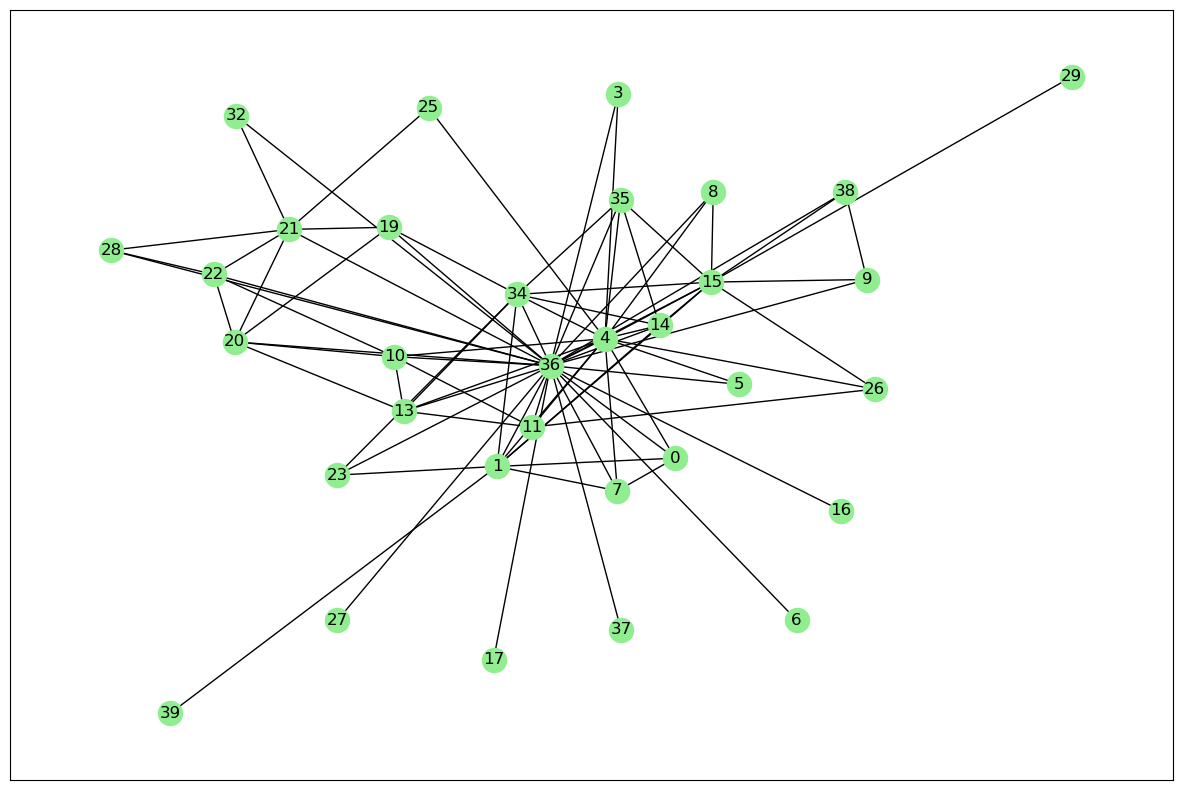

In [36]:
#graph = nx.Graph()
#graph.add_weighted_edges_from(weighted_edges)

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G_Dep_Reduced)
nx.draw_networkx(G_Dep_Reduced, pos, node_color = 'lightgreen')
#edge_labels = nx.get_edge_attributes(G_Dep_Reduced, "weight")
#nx.draw_networkx_edge_labels(G_Dep_Reduced, pos, edge_labels=edge_labels)
plt.show()

In [58]:
print(nx.average_clustering(G_Dep_Reduced))

0.5677452738058798


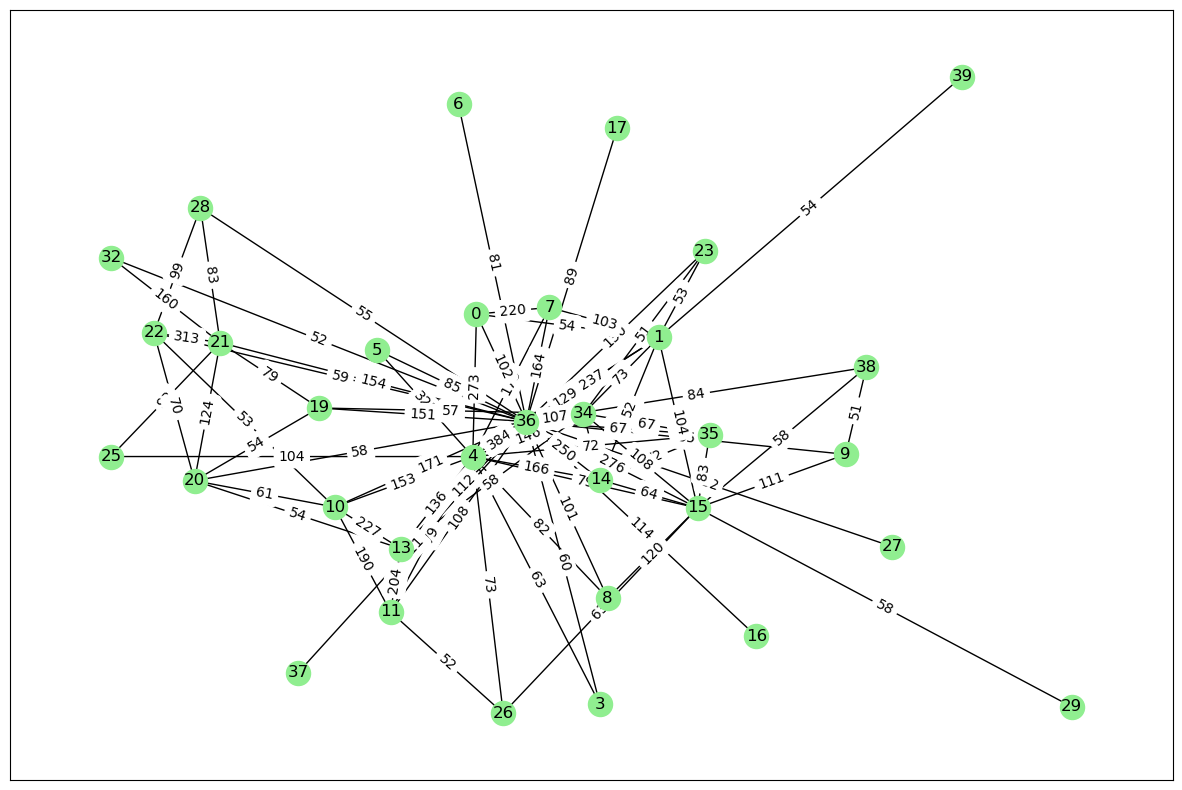

In [37]:
plt.figure(figsize=(15,10))

pos = nx.spring_layout(G_Dep_Reduced)
nx.draw_networkx(G_Dep_Reduced, pos, node_color = 'lightgreen')
edge_labels = nx.get_edge_attributes(G_Dep_Reduced, "weight")
nx.draw_networkx_edge_labels(G_Dep_Reduced, pos, edge_labels=edge_labels)
plt.show()

In [38]:
#print(nx.info(G_Dep_Reduced)) #-> DeprecationWarning: info is deprecated and will be removed in version 3.0.

print(G_Dep_Reduced.nodes)
print(G_Dep_Reduced.edges)
print(G_Dep_Reduced)
print(G_Dep_Reduced.edges(data=True))

[14, 25, 9, 26, 4, 17, 34, 5, 36, 37, 7, 21, 22, 8, 15, 29, 1, 16, 38, 27, 6, 0, 13, 35, 23, 10, 11, 20, 32, 19, 39, 28, 3]
[(14, 4), (14, 36), (14, 35), (14, 34), (14, 15), (14, 1), (25, 4), (25, 21), (9, 38), (9, 36), (9, 15), (26, 11), (26, 4), (26, 15), (4, 7), (4, 5), (4, 1), (4, 8), (4, 13), (4, 0), (4, 15), (4, 10), (4, 35), (4, 36), (4, 34), (4, 11), (4, 3), (17, 36), (34, 36), (34, 13), (34, 23), (34, 15), (34, 35), (34, 1), (34, 19), (5, 36), (36, 37), (36, 21), (36, 13), (36, 38), (36, 19), (36, 23), (36, 11), (36, 20), (36, 1), (36, 27), (36, 15), (36, 35), (36, 10), (36, 7), (36, 16), (36, 0), (36, 6), (36, 3), (36, 8), (36, 32), (36, 28), (36, 22), (7, 0), (7, 1), (21, 22), (21, 32), (21, 20), (21, 19), (21, 28), (22, 28), (22, 20), (22, 10), (8, 15), (15, 29), (15, 38), (15, 1), (15, 35), (1, 39), (1, 0), (1, 23), (13, 10), (13, 11), (13, 20), (10, 11), (10, 20), (20, 19)]
Graph with 33 nodes and 82 edges
[(14, 4, {'weight': 166}), (14, 36, {'weight': 250}), (14, 35, {'w

## Triads (with 3 edges)

In [41]:
from itertools import combinations
weighted_triads = []
for triads in combinations(G_Dep_Reduced.nodes, 3):
    triad_graph = G_Dep_Reduced.subgraph(triads)
    if (triad_graph.number_of_edges() == 3):
        weighted_triads.append((triads,triad_graph[triads[0]][triads[1]]['weight']+triad_graph[triads[1]][triads[2]]['weight']+triad_graph[triads[0]][triads[2]]['weight']))
sorted_weighted_triads = sorted(weighted_triads, key=lambda item: item[1], reverse=True)
print(len(weighted_triads))
print('Triadi più rilevanti:\n')
for i in range(10):
    print(str(i+1)+') '+str(sorted_weighted_triads[i][0])[1:-1]+' (weight: '+str(sorted_weighted_triads[i][1])+') ')

82
Triadi più rilevanti:

1) 14, 4, 36 (weight: 800) 
2) 4, 5, 36 (weight: 790) 
3) 4, 36, 0 (weight: 759) 
4) 4, 36, 1 (weight: 750) 
5) 4, 36, 15 (weight: 739) 
6) 4, 36, 7 (weight: 724) 
7) 4, 36, 10 (weight: 708) 
8) 4, 7, 0 (weight: 669) 
9) 4, 34, 36 (weight: 637) 
10) 4, 36, 13 (weight: 632) 


## Cliques. Find and visualize the greatest clique

28
[[36, 32, 21], [36, 4, 1, 0, 7], [36, 4, 1, 34, 14, 15], [36, 4, 3], [36, 4, 35, 34, 14, 15], [36, 4, 5], [36, 4, 8, 15], [36, 4, 10, 11, 13], [36, 4, 13, 34], [36, 37], [36, 6], [36, 38, 9, 15], [36, 16], [36, 17], [36, 19, 34], [36, 19, 20, 21], [36, 20, 10, 13], [36, 20, 10, 22], [36, 20, 21, 22], [36, 21, 28, 22], [36, 23, 1, 34], [36, 27], [39, 1], [25, 4], [25, 21], [26, 4, 11], [26, 4, 15], [29, 15]]
<class 'set'>

Nodi appartenenti alla clique massima:

{1, 34, 36, 4, 14, 15}


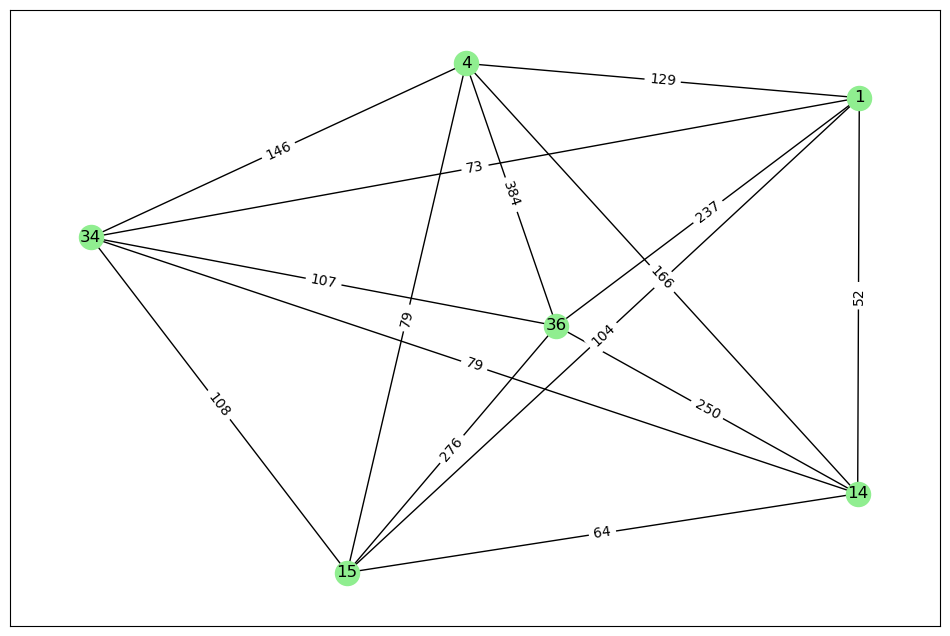

In [87]:
cliques = nx.find_cliques(G_Dep_Reduced)

from networkx.algorithms.approximation import clique

list_of_cliques = list(cliques)
print(len(list_of_cliques)) #28 clique found

print(list_of_cliques)


maxx = clique.max_clique(G_Dep_Reduced)
print(type(maxx))
print()
print('Nodi appartenenti alla clique massima:\n')
print(maxx)
max_clique_subgraph = G_Dep_Reduced.subgraph(maxx)



plt.figure(figsize=(12,8))

pos = nx.spring_layout(max_clique_subgraph)
nx.draw_networkx(max_clique_subgraph, pos, node_color = 'lightgreen')
edge_labels = nx.get_edge_attributes(max_clique_subgraph, "weight")
nx.draw_networkx_edge_labels(max_clique_subgraph, pos, edge_labels=edge_labels)
plt.show()


### NB Person identified as '160' belongs to the department n°36 -> HP: 160 communicates with a huge number of people that belongs to other departments

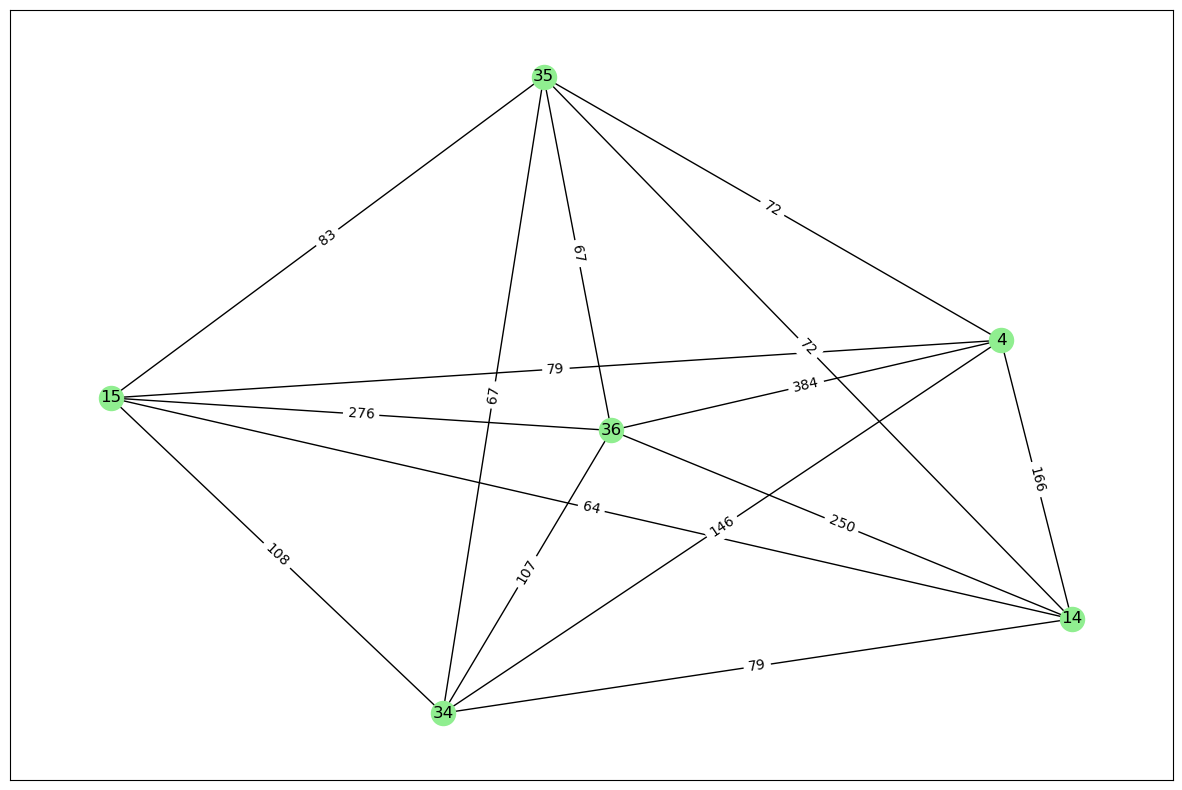

In [83]:
another_clique_subgraph = G_Dep_Reduced.subgraph({36, 4, 35, 34, 14, 15})


plt.figure(figsize=(15,10))

pos = nx.spring_layout(another_clique_subgraph)
nx.draw_networkx(another_clique_subgraph, pos, node_color = 'lightgreen')
edge_labels = nx.get_edge_attributes(another_clique_subgraph, "weight")
nx.draw_networkx_edge_labels(another_clique_subgraph, pos, edge_labels=edge_labels)
plt.show()

In [74]:
#check
sum_1 = max_clique_subgraph.size(weight="weight") #-> the greatest OK
sum_2 = another_clique_subgraph.size(weight="weight")
print(sum_1)
print(sum_2)



2254.0
2020.0


## Clustering coefficient

In [141]:
clust_coeff = nx.clustering(G_departments)
print(clust_coeff)

{14: 0.8364153627311522, 25: 0.8588235294117647, 9: 0.8558558558558559, 26: 0.8207681365576103, 4: 0.8108108108108109, 17: 0.9261363636363636, 34: 0.8043184885290149, 5: 0.9556451612903226, 36: 0.7692307692307693, 37: 0.8228228228228228, 7: 0.8507936507936508, 21: 0.875222816399287, 22: 0.892436974789916, 8: 0.8571428571428571, 15: 0.7894736842105263, 29: 0.9576719576719577, 1: 0.8043184885290149, 16: 0.9556451612903226, 38: 0.8221906116642959, 27: 0.9656084656084656, 6: 0.8823529411764706, 0: 0.9356060606060606, 13: 0.8825396825396825, 2: 0.9379310344827586, 35: 0.8364153627311522, 40: 0.9090909090909091, 23: 0.9225806451612903, 10: 0.8408408408408409, 11: 0.8571428571428571, 24: 0.9649122807017544, 20: 0.9375, 32: 0.9375, 19: 0.8734402852049911, 31: 0.987012987012987, 39: 0.9673202614379085, 28: 0.896551724137931, 12: 0.9766081871345029, 3: 0.9927536231884058, 30: 0.9833333333333333, 41: 1.0, 18: 1.0, 33: 0}


In [142]:
clust = nx.clustering(G_Dep_Reduced)
print(clust)

{14: 0.9333333333333333, 25: 0, 9: 1.0, 26: 0.6666666666666666, 4: 0.26666666666666666, 17: 0, 34: 0.5277777777777778, 5: 1.0, 36: 0.12433862433862433, 37: 0, 7: 1.0, 21: 0.38095238095238093, 22: 0.7, 8: 1.0, 15: 0.36363636363636365, 29: 0, 1: 0.4722222222222222, 16: 0, 38: 1.0, 27: 0, 6: 0, 0: 1.0, 13: 0.6666666666666666, 35: 1.0, 23: 1.0, 10: 0.6666666666666666, 11: 0.7, 20: 0.6, 32: 1.0, 19: 0.6666666666666666, 39: 0, 28: 1.0, 3: 1.0}


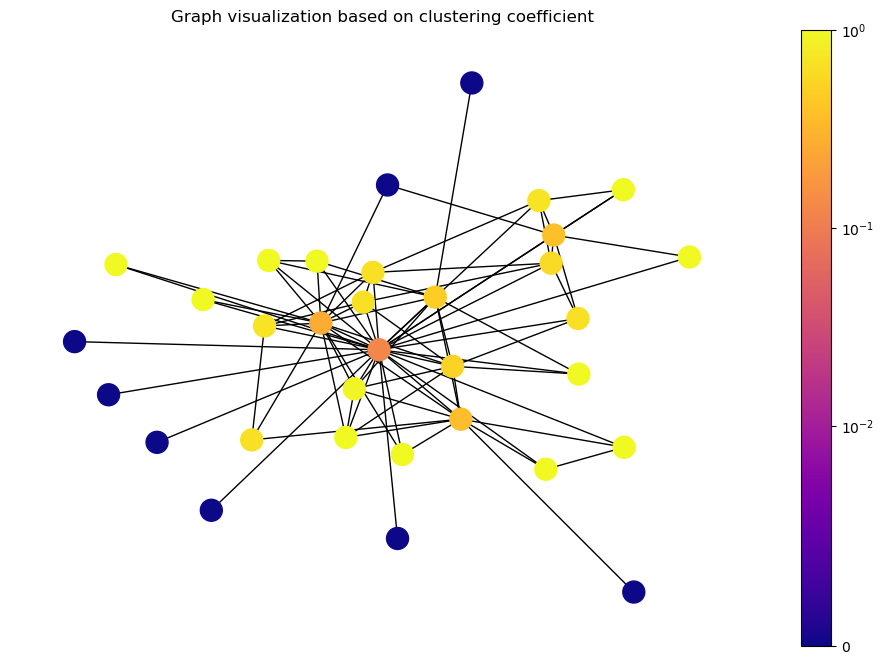

In [154]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G_Dep_Reduced)
draw(G_Dep_Reduced, pos, clust ,'Graph visualization based on clustering coefficient')
plt.show()


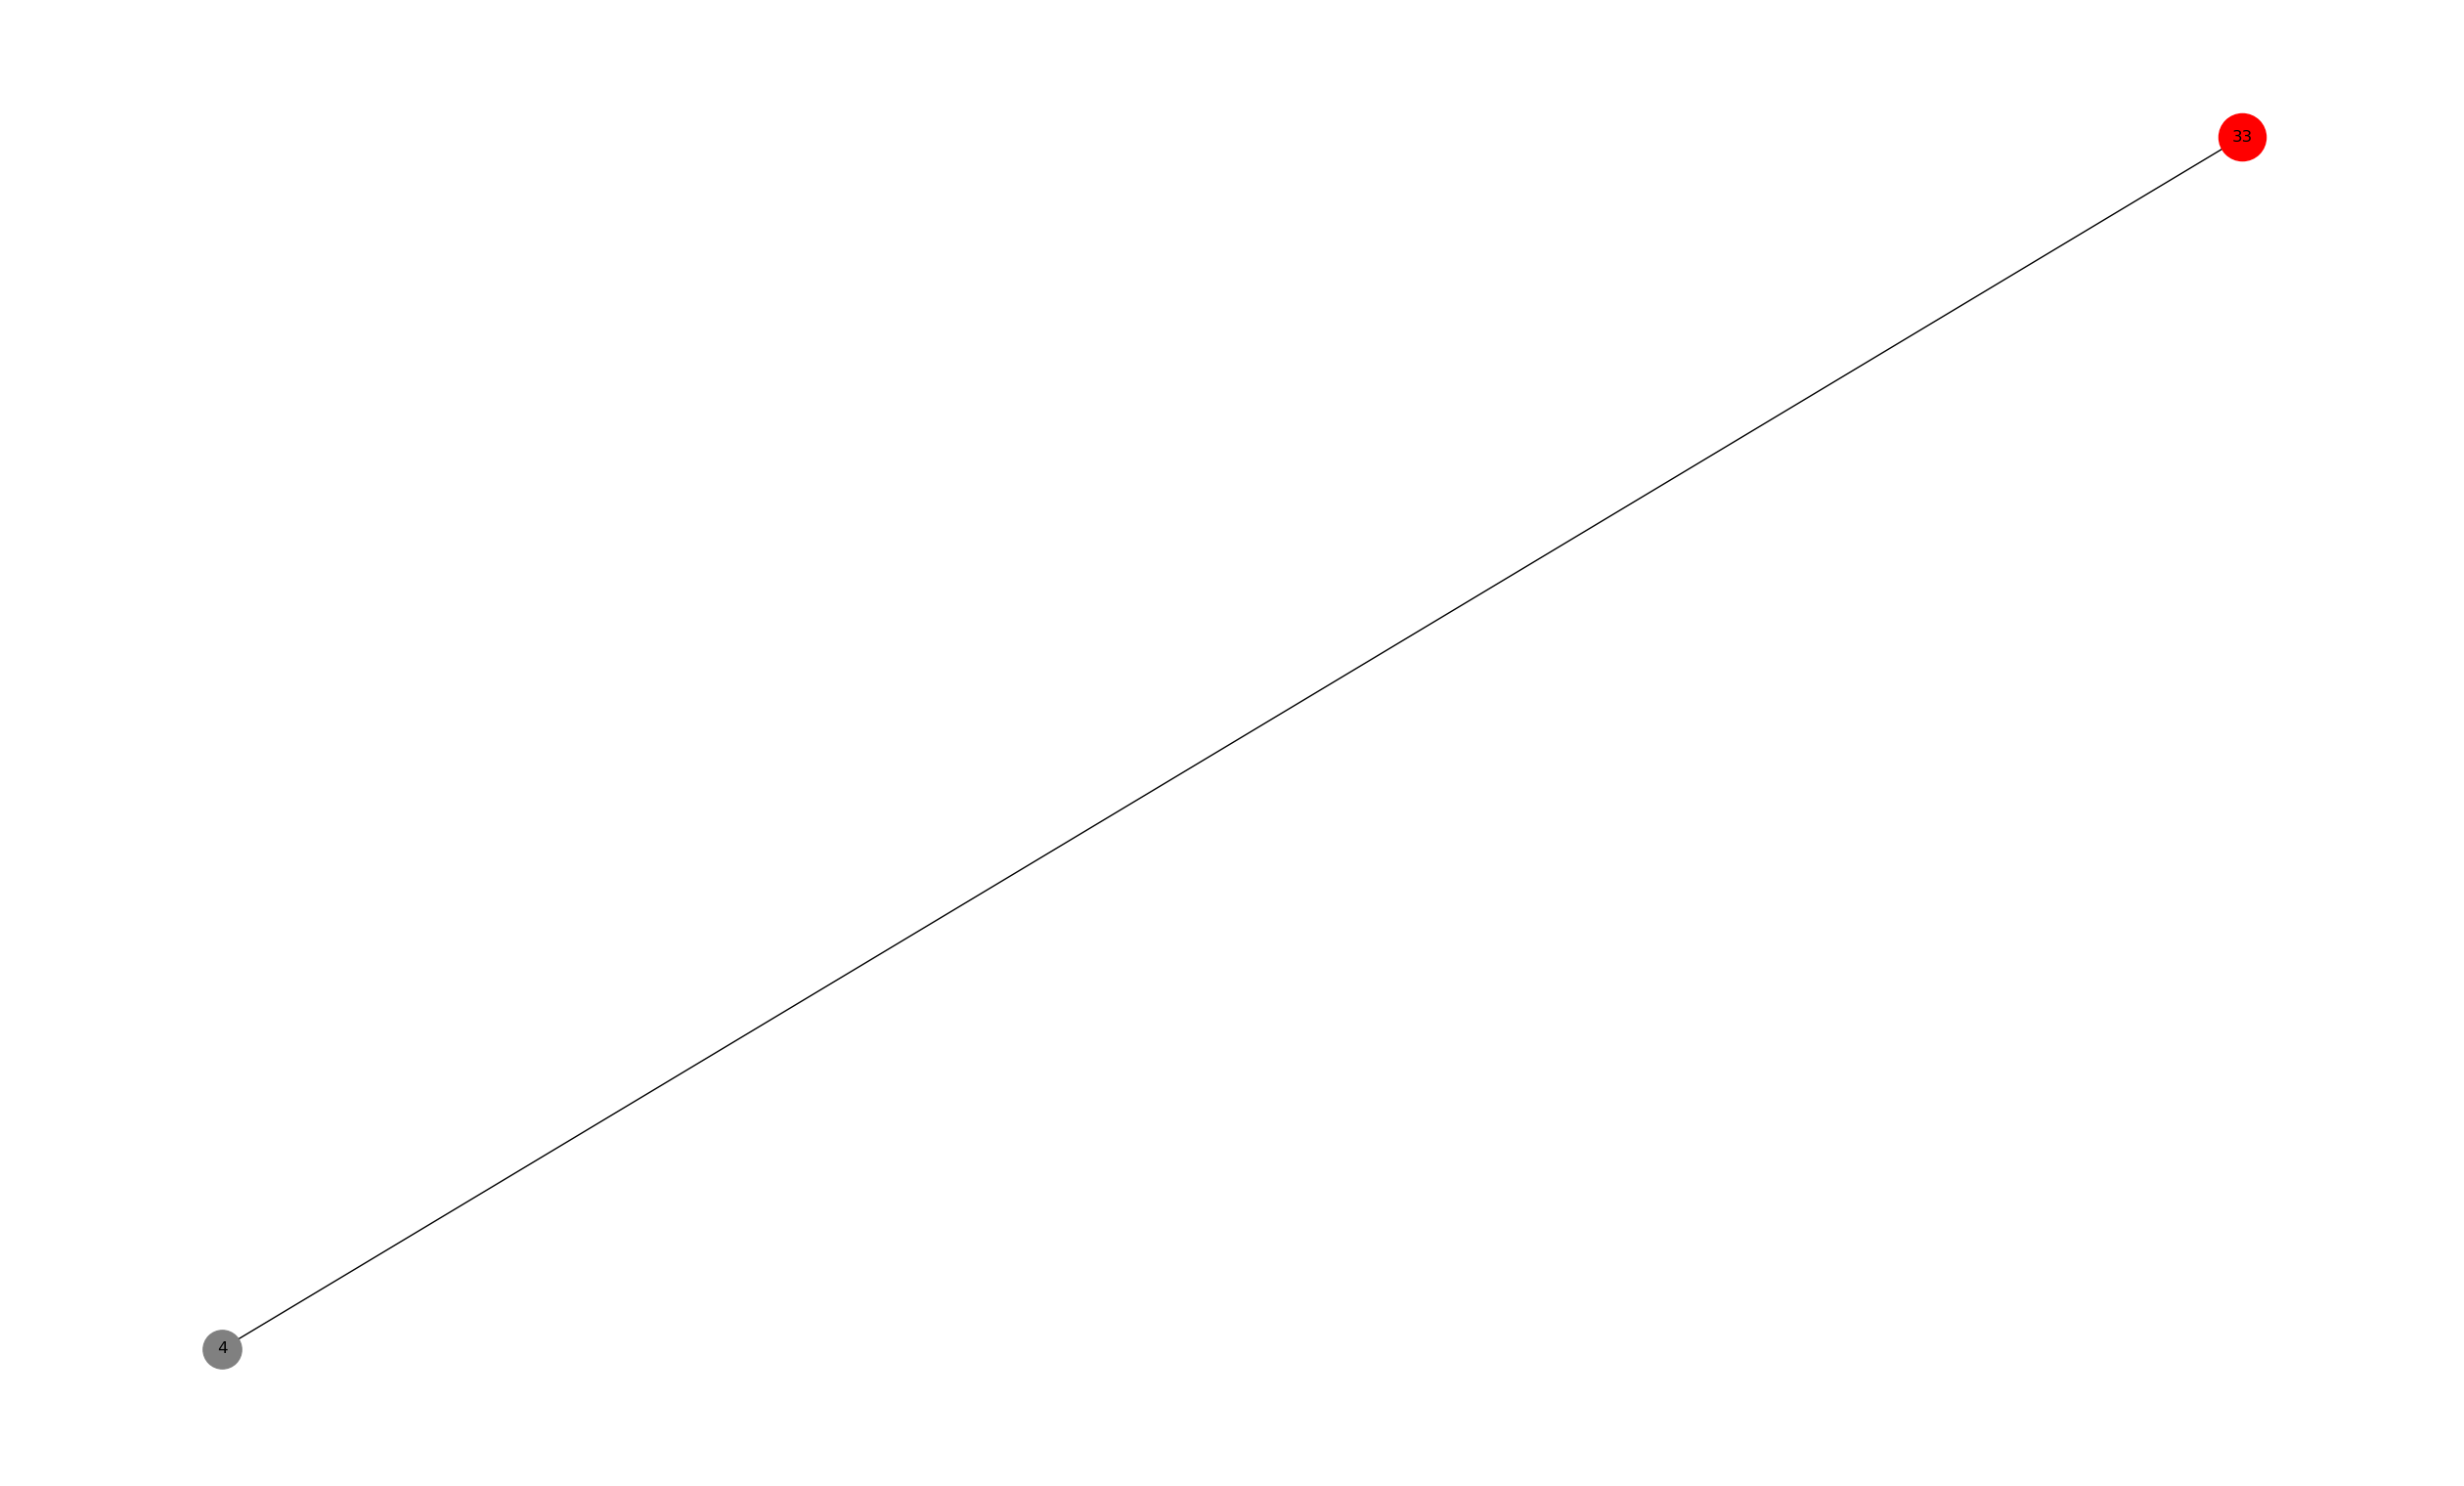

In [40]:
#nx.ego_graph(DG_strong, 160, radius=1, center=True, undirected=False, distance=None)

# Defining ego as large and red
# while alters are grey
# Let '160' be the ego
ego = 33
options = {"node_size": 1200, "node_color": "r"}


# create ego network
ego_net = nx.ego_graph(G_departments, ego) #undirected = True to get both directions

# showing the ego network
plt.figure(figsize=(25,15))
pos = nx.spring_layout(ego_net)
nx.draw(ego_net, pos, node_color="grey", 
        node_size = 800, with_labels = True)
  
nx.draw_networkx_nodes(ego_net, pos, nodelist = [ego], **options)
  
plt.show()
#it is only connected to node 4.